Fernando Cerriteño Magaña - A01702790

In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.random.mtrand import logistic
from numpy.random.mtrand import standard_cauchy
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import f_oneway, t
import scipy.stats as stats
import statsmodels.api as sm

In [145]:
df = pd.read_csv('/content/breast_cancer.csv')

In [146]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [147]:
df = df.rename(columns={'concave points_mean': "concave_points_mean"})

In [148]:
df = df.drop(['id'], axis = 1)
df = df.drop(['diagnosis'], axis = 1)

Verificación que los datos esten completos

In [149]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Se revisa que no exista correlación entre los datos

In [150]:
correlacion = df.corr()

In [151]:
alta_corr = np.where((correlacion>0.95)&(correlacion<1))
alta_corr

(array([ 0,  0,  0,  0,  2,  2,  2,  2,  3,  3,  3,  3,  3, 10, 10, 12, 13,
        20, 20, 20, 20, 20, 22, 22, 22, 22, 22, 23, 23, 23]),
 array([ 2,  3, 20, 22,  0,  3, 20, 22,  0,  2, 20, 22, 23, 12, 13, 10, 10,
         0,  2,  3, 22, 23,  0,  2,  3, 20, 23,  3, 20, 22]))

In [152]:
baja_corr = np.where((correlacion<-0.95)&(correlacion>-1))
baja_corr

(array([], dtype=int64), array([], dtype=int64))

Se ajustan los datos para remover correlacion

In [153]:
scaler = StandardScaler()
df_estandar = scaler.fit_transform(df)

In [154]:
df_estandar = pd.DataFrame(df_estandar,columns=df.columns)

Para nuestro caso, la hipotesis nula para un coeficiente de regresión ($β_i$)es:

$(H_o): β_i == 0$

El estadístico de prueba para un coeficiente de regresión (t-valor).
Este valor es calculado dividiendo el coeficiente de regresión estimado ($\widehatβ̂_i$) por su error estándar ($SE(\widehatβ̂_i)$):

$t = \frac{\widehatβ̂_i}{SE(\widehatβ̂_i)}$

La distribución del estadístico de prueba depende del estadistico de prueba, no obstante bajo la asumnción de que el estadistico de prueba es t, la distribución va a seguir una distribución t student con $n - k - 1$ grados de libertad donde n es el número de observaciones y k es el número de variables independientes en el modelo.

Diagrama de confianza

In [155]:
grados_libertad = len(df.axes[0]) - len(df.axes[1])

In [156]:
grados_libertad

539

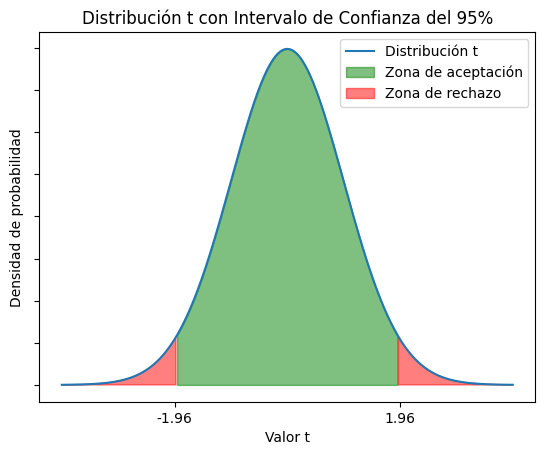

In [157]:
degrees_of_freedom = 539
confidence_level = 0.95
critical_value = stats.t.ppf(1 - (1 - confidence_level) / 2, degrees_of_freedom)

t_values = np.linspace(-4, 4, 400)
t_distribution = stats.t.pdf(t_values, degrees_of_freedom)

fig,ax = plt.subplots(1)
ax.plot(t_values, t_distribution, label='Distribución t')

ax.fill_between(t_values, 0, t_distribution, where=np.abs(t_values) <= critical_value, alpha=0.5, color='green', label='Zona de aceptación')
ax.fill_between(t_values, 0, t_distribution, where=np.abs(t_values) > critical_value, alpha=0.5, color='red', label='Zona de rechazo')

plt.xlabel('Valor t')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución t con Intervalo de Confianza del 95%')
ax.set_yticklabels([])
ax.set_xticks([-2, 2])
ax.set_xticklabels([-1.960,1.960])
ax.legend()
plt.show()

Modelo de regresión multiple

In [158]:
train, test = train_test_split(df_estandar, test_size = 0.2, random_state = 42)

In [159]:
modelo = smf.ols(formula='radius_mean~texture_mean+perimeter_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se', data=train)

In [160]:
modelo = modelo.fit()

In [161]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.678e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:51:18   Log-Likelihood:                 1039.7
No. Observations:                 455   AIC:                            -2055.
Df Residuals:                     443   BIC:                            -2006.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [162]:
modelo = smf.ols(formula='radius_mean~texture_mean+area_mean+smoothness_mean+compactness_mean+concavity_mean+concave_points_mean+symmetry_mean+fractal_dimension_mean+radius_se+texture_se', data=train)

modelo = modelo.fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:            radius_mean   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3002.
Date:                Mon, 04 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:51:19   Log-Likelihood:                 314.92
No. Observations:                 455   AIC:                            -607.8
Df Residuals:                     444   BIC:                            -562.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

En forma matricial, la fórmula de regresión lineal múltiple se puede expresar como:

$y=\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p+ɛ$

Donde:

$y$ es la variable de respuesta.

$\beta_0$ es el intercepto que representa el valor de $y$ cuando tudas las variables predictoras son cero.

$\beta_1,\beta_2,...,\beta_p$ son los coeficientes de regresión que representan el cambio en $y$ asociado con un cambio unitario en las varibales predictoras correspondientes.

$x_1,x_2,...,x_p$ son las variables predictoras.

$ɛ$ es el término de error que representa la variablilidad no explicada del modelo.

In [163]:
coefs = modelo.HC0_se.to_numpy()

In [164]:
print('Lista de coeficientes del modelo ', coefs)

Lista de coeficientes del modelo  [0.00561086 0.00717197 0.03028286 0.01311619 0.02493743 0.03253191
 0.04290769 0.00758578 0.0169003  0.02362515 0.00895742]


In [165]:
y_pred = modelo.predict(test)

E = test.radius_mean-y_pred

Comparación entre datos reales y predicción

In [166]:
tabla = pd.DataFrame(data={'Valor real': test.radius_mean,'Predicción':y_pred,'Error':E})
tabla.head()

,Valor real,Predicción,Error
204,-0.470694,-0.466938,-0.003756
70,1.366877,1.320826,0.046052
131,0.378508,0.395180,-0.016672
431,-0.490575,-0.537279,0.046704
540,-0.734828,-0.722212,-0.012616


En la prueba F-Fisher, la hipótesis nula $H0$ y la distribución del estadístico de prueba varían según el contexto.

La hipótesis nula para la prueba F en la significancia del modelo es:

$H0$: Todos los coeficientes de regresión son iguales a cero, lo que significa que el modelo no tiene capacidad para explicar la variabilidad en la variable objetivo. En otras palabras, las variables predictoras no tienen un efecto conjunto significativo en la variable de respuesta.

La hipótesis alternativa $H1$ es que al menos uno de los coeficientes de regresión es diferente de cero, lo que indica que el modelo tiene algún valor predictivo significativo.

El estadístico de prueba F sigue una distribución F de Fisher. Si el modelo completo tiene p variables predictoras y el modelo reducido no tiene predictoras (solo constante), entonces:

Grados de libertad del numerador $dfn$: p (número de variables predictoras en el modelo completo).

Grados de libertad del denominador $dfd$: N - p - 1 (número total de observaciones menos el número de variables predictoras menos 1 para el intercepto).

In [167]:
# Realizar la prueba ANOVA
resultado_anova = f_oneway(df['texture_mean'], df['area_mean'], df['smoothness_mean'], df['compactness_mean'], df['concavity_mean'], df['concave_points_mean'], df['symmetry_mean'], df['fractal_dimension_mean'], df['radius_se'], df['texture_se'])

# Obtener los grados de libertad del numerador y del denominador
dfn = len(df.columns) - 1
dfd = len(df) - len(df.columns)


In [168]:
print("Estadística F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)
print("Grados de libertad del numerador:", dfn)
print("Grados de libertad del denominador:", dfd)

Estadística F: 1957.4926598413363
Valor p: 0.0
Grados de libertad del numerador: 29
Grados de libertad del denominador: 539


In [169]:
degrees_of_freedom = 539
confidence_level = 0.95

# Calcular el valor crítico
valor_critico = stats.f.ppf(1 - (1 - confidence_level) / 2, dfn, dfd)

print("Valor crítico de F:", valor_critico)

Valor crítico de F: 1.6040149414026632


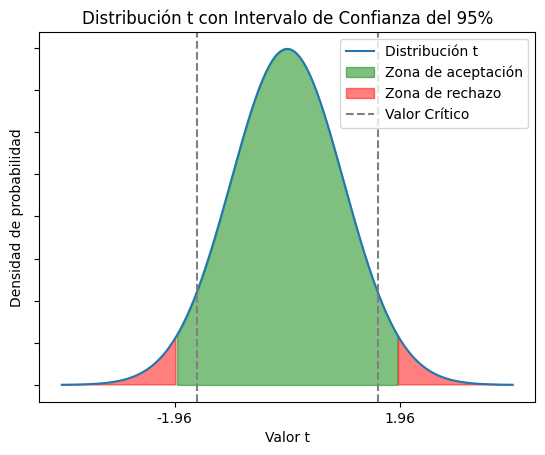

In [170]:
critical_value = stats.t.ppf(1 - (1 - confidence_level) / 2, degrees_of_freedom)

t_values = np.linspace(-4, 4, 400)
t_distribution = stats.t.pdf(t_values, degrees_of_freedom)

fig,ax = plt.subplots(1)
ax.plot(t_values, t_distribution, label='Distribución t')

ax.fill_between(t_values, 0, t_distribution, where=np.abs(t_values) <= critical_value, alpha=0.5, color='green', label='Zona de aceptación')
ax.fill_between(t_values, 0, t_distribution, where=np.abs(t_values) > critical_value, alpha=0.5, color='red', label='Zona de rechazo')

ax.axvline(x=valor_critico, color='grey', linestyle='--', label='Valor Crítico')
ax.axvline(x=-valor_critico, color='grey', linestyle='--')

plt.xlabel('Valor t')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución t con Intervalo de Confianza del 95%')
ax.set_yticklabels([])
ax.set_xticks([-2, 2])
ax.set_xticklabels([-1.960,1.960])
ax.legend()
plt.show()

Modelo de regresión hacia atrás

In [171]:
# Función para ajustar un modelo y calcular el valor p para cada característica
def fit_and_get_p_values(X, y):
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues
    return p_values

In [172]:
df = sm.add_constant(df)

In [173]:
df.head()

,const,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


El objetivo principal en regresión hacia atras es obtener un modelo más simple y más interpretable sin sacrificar la precisión de la predicción. El criterio general para eliminar variables en el modelo de regresión hacia atrás es:

1. En un modelo completo que cuente con un modelo de regresión ajustado, se selecciona un criterio de eliminación, como un nivel de significancia o un cambio en el estadistico F.

2. Se elimina la variable predictora menos significativa segun el criterio seleccionado en el paso anterior, en este caso se revisa el p value.

3. Se realiza un reajuste del modelo con las variables restantes.

4. Se evalua el nuevo modelo y se compara con el modelo anterior, esto con el proposito de verificar si el nuevo modelo es mejor, y si su capacidad predictiva sigue siendo igual o mejor.

5. Se repite el proceso hasta que las variables restantes en el modelo sean significativas o hasta que se este satisfecho con la precisión y simplicidad del modelo.

In [174]:
max_p_value = 0.05
while True:
    p_values = fit_and_get_p_values(train.drop(columns=['radius_mean']), train['radius_mean'])
    max_p_value_index = p_values.idxmax()
    max_p_value_value = p_values[max_p_value_index]

    if max_p_value_value > max_p_value:
        print(f"Eliminando '{max_p_value_index}' con valor p={max_p_value_value:.4f}")
        train = train.drop(columns=max_p_value_index)
        test = test.drop(columns=max_p_value_index)
    else:
        break

Eliminando 'texture_worst' con valor p=0.9662
Eliminando 'texture_se' con valor p=0.8981
Eliminando 'concavity_worst' con valor p=0.8738
Eliminando 'concave_points_mean' con valor p=0.6400
Eliminando 'concave points_worst' con valor p=0.7375
Eliminando 'smoothness_se' con valor p=0.5272
Eliminando 'compactness_se' con valor p=0.5052
Eliminando 'area_se' con valor p=0.4497
Eliminando 'fractal_dimension_worst' con valor p=0.4317
Eliminando 'radius_se' con valor p=0.0949
Eliminando 'texture_mean' con valor p=0.0787


Análisis de los resultados

In [175]:
final_model = sm.OLS(train['radius_mean'], train.drop(columns=['radius_mean'])).fit()
print(final_model.summary())

                                 OLS Regression Results                                
Dep. Variable:            radius_mean   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.723e+04
Date:                Mon, 04 Sep 2023   Prob (F-statistic):                        0.00
Time:                        23:51:19   Log-Likelihood:                          1240.2
No. Observations:                 455   AIC:                                     -2444.
Df Residuals:                     437   BIC:                                     -2370.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [176]:
y_pred = final_model.predict(test.drop(columns=['radius_mean']))
tabla = pd.DataFrame(data={'Valor real': test.radius_mean,'Predicción':y_pred,'Error':test.radius_mean-y_pred})

Analisis de resultados

In [177]:
tabla

,Valor real,Predicción,Error
204,-0.470694,-0.454358,-0.016337
70,1.366877,1.366228,0.000650
131,0.378508,0.392072,-0.013564
431,-0.490575,-0.504292,0.013716
540,-0.734828,-0.739252,0.004424
...,...,...,...
486,0.145616,0.152166,-0.006550
75,0.551757,0.546082,0.005674
249,-0.740508,-0.739309,-0.001199
238,0.026330,0.014841,0.011489


In [178]:
print('MAE =',np.sum(np.abs(tabla.Error)/len(tabla))**2)

MAE = 0.0001617317428659931
